### 1.  Feedforward: Building a ReLU neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



Consider the rectified linear activation function : $h_j = max(0, a_j)$

1. Draw a network with:
    * 2 inputs
    * 1 hidden layers with 4 hidden units and a
    * 1-class output (for binary classification)


![](HW2_1.jpeg)

2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).
$$h_{1}=max(0,x_1\cdot W_{11}+x_2\cdot W_{21}+b_{11})$$
$$h_{2}=max(0,x_1\cdot W_{12}+x_2\cdot W_{22}+b_{12})$$
$$h_{3}=max(0,x_1\cdot W_{13}+x_2\cdot W_{23}+b_{13})$$
$$h_{4}=max(0,x_1\cdot W_{14}+x_2\cdot W_{24}+b_{14})$$
$$y=\sigma(h_{1}\cdot V_1+h_{2}\cdot V_2+h_{3}\cdot V_3+h_{4}\cdot V_4+b_2)$$


3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-np.array(z)))

def relu(z):
    z = np.array(z)
    return np.maximum(0,z)

def ff_nn_ReLu(X,W,V,b1,b2):
    h1 = relu(X.dot(W)+b1)
    y = sigmoid(h1.dot(V)+b2)
    return y

4. what are the class probabilities associated with the forward pass of each
sample?

In [3]:
X = np.array([[1,-1],[0,-1],[0,1]])
W = np.array([[1,-1,0,1],[0,0,0.5,1]])
V = np.array([1,0,-1,1]).reshape(4,1)
b1 = np.array([0,0,1,0])
b2 = np.array([1])

ff_nn_ReLu(X,W,V,b1,b2)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

###  Gradient Descent

Consider a simple non-convex function of two variables:
$$f(x,y)=(3-x^3)+50*(2y^2-x)^2$$

1. What are the partial derivatives of $f$ with respect to $x$ and to $y$?

$$\frac{\partial f}{\partial x}=-3x^2-200y^2+100x$$
$$\frac{\partial f}{\partial y}=400y(2y^2-x)$$

2. Create a visualization of the contours of this function.


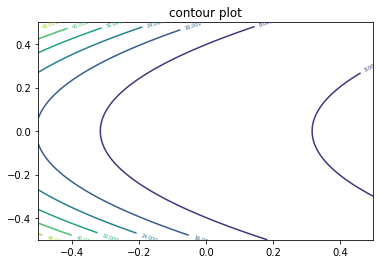

In [16]:
delta = 0.00025
a = np.arange(-0.5,0.5, delta)
b = np.arange(-0.5,0.5, delta)
X, Y = np.meshgrid(a, b)
Z = (3-X**3)+50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_title('contour plot')
ax.clabel(CS,inline = True, fontsize = 5)
plt.show()

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [108]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*y**2+100*x
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-0.5,0.5,size=2)
    else:
        point = starting_point
      
    trajectory = [point]

    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate* grad
        trajectory.append(point)
    
    return np.array(trajectory)



def visualize(iters,lr):
    delta = 0.00025
    a = np.arange(-0.5,0.5, delta)
    b = np.arange(-0.5,0.5, delta)
    X, Y = np.meshgrid(a, b)
    Z = (3-X**3)+50*(2*Y**2-X)**2
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    
    traj = grad_descent(iterations=iters, learning_rate=lr)
    x= traj[:,0]
    y= traj[:,1]
    x_min = np.round(x[len(x)-1],3)
    y_min = np.round(y[len(x)-1],3)
    plt.plot(x,y,'-o', markersize=3,linewidth=1,color="red")
    ax.set_title('Gradient descent with learning rate={} and iterations={}'.format(lr,iters))
    ax.clabel(CS,inline = True, fontsize = 5)
    ax.annotate('('+str(x_min)+','+str(y_min)+')',xy=(x_min,y_min))
    plt.show()

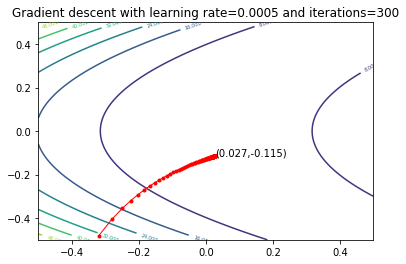

In [52]:
np.random.seed(11)
visualize(300,0.0005)

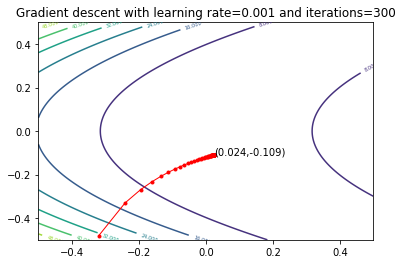

In [53]:
np.random.seed(11)
visualize(300,0.001)

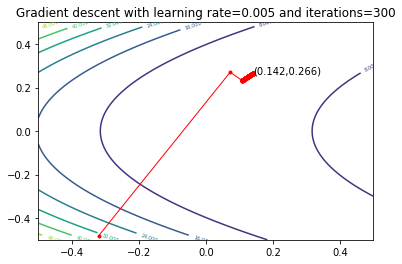

In [54]:
np.random.seed(11)
visualize(300,0.005)

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.

In [70]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, learning_rate=10):
    if starting_point is None:
        point = np.random.uniform(-0.5,0.5,size=2)
    else:
        point = starting_point
      
    trajectory = [point]
    v = np.zeros(point.size)

    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + learning_rate * grad
        point = point - v
        trajectory.append(point)
    
    return np.array(trajectory)

def visualize_mm(iters,lr,al):
    delta = 0.00025
    a = np.arange(-0.5,0.5, delta)
    b = np.arange(-0.5,0.5, delta)
    X, Y = np.meshgrid(a, b)
    Z = (3-X**3)+50*(2*Y**2-X)**2
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    
    traj = grad_descent_with_momentum(iterations=iters, learning_rate=lr, alpha=al)
    x= traj[:,0]
    y= traj[:,1]
    x_min = np.round(x[len(x)-1],3)
    y_min = np.round(y[len(x)-1],3)
    plt.plot(x,y,'-o', markersize=3,linewidth=1,color="red")
    ax.set_title('Gradient descent with momentum: alpha={} learning rate={} and iterations={}'.format(al,lr,iters))
    ax.clabel(CS,inline = True, fontsize = 5)
    ax.annotate('('+str(x_min)+','+str(y_min)+')',xy=(x_min,y_min))
    plt.show()

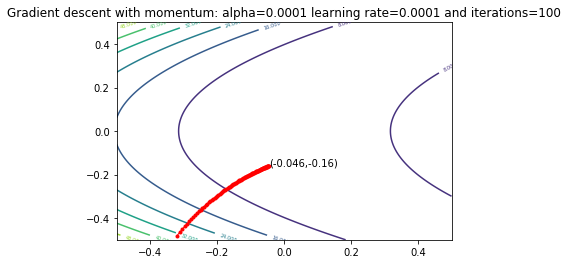

In [85]:
np.random.seed(11)
visualize_mm(100,0.0001,0.0001)

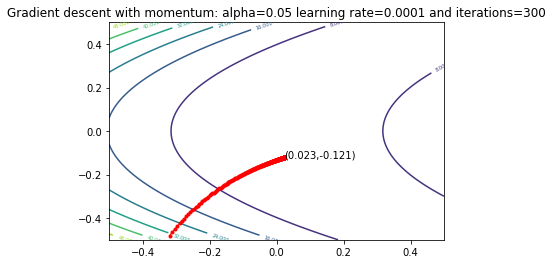

In [86]:
np.random.seed(11)
visualize_mm(300,0.0001,0.05)

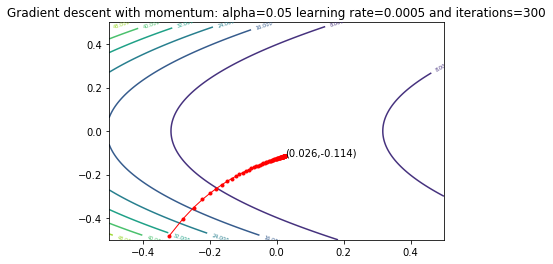

In [87]:
np.random.seed(11)
visualize_mm(300,0.0005,0.05)

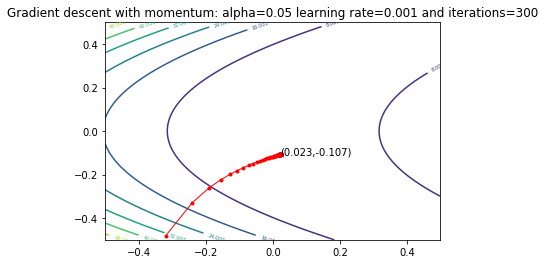

In [88]:
np.random.seed(11)
visualize_mm(300,0.001,0.05)

### Backprop

1. For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters.

$$h_{1}=max(0,x_1\cdot W_{11}+x_2\cdot W_{21}+b_{1})$$
$$h_{2}=max(0,x_1\cdot W_{12}+x_2\cdot W_{22}+b_{2})$$
$$h_{3}=max(0,x_1\cdot W_{13}+x_2\cdot W_{23}+b_{3})$$
$$h_{4}=max(0,x_1\cdot W_{14}+x_2\cdot W_{24}+b_{4})$$
$$y=\sigma(h_{1}\cdot V_1+h_{2}\cdot V_2+h_{3}\cdot V_3+h_{4}\cdot V_4+c)$$

Loss function: 
$$L=-ylog(\hat y)-(1-y)log(1-\hat y)$$

Let $$z=h_{1} V_1+h_{2} V_2+h_{3}V_3+h_{4} V_4+c$$

$$\frac{\partial L}{\partial \hat y} = -\left( \frac{ y}{ \hat y} -\frac{ 1-y}{ 1-\hat y} \right); \frac{\partial \hat y}{\partial z} = \frac{\partial \sigma (z)}{\partial z} = \sigma (z)(1- \sigma (z))$$

$$
\begin{align}
\frac{\partial L}{\partial v_i} &=\frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial v_i} = -\left( \frac{ y}{ \hat y} -\frac{ 1-y}{ 1-\hat y} \right)\hat y (1- \hat y) h_i , i \in (1,2,3,4)\\
\frac{\partial L}{\partial c} &=\frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial c} = -\left( \frac{ y}{ \hat y} -\frac{ 1-y}{ 1-\hat y} \right)\hat y (1- \hat y) \\
\frac{\partial L}{\partial w_{ij}} &=\frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial h_j} \frac{\partial h_j}{\partial w_{ij}} = \begin{cases} -\left( \frac{ y}{ \hat y} -\frac{ 1-y}{ 1-\hat y} \right)\hat y (1- \hat y)v_j x_i ; \text{ if } w_{1j}x_1+w_{2j}x_2+b_j >0\\ 0 ; \text{ if }  w_{1j}x_1+w_{2j}x_2+b_j \leq 0
\end{cases} j \in (1,2,3,4),i \in (1,2) \\
\frac{\partial L}{\partial b_j} &=\frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial h_j} \frac{\partial h_j}{\partial b_j} = \begin{cases} -\left( \frac{ y}{ \hat y} -\frac{ 1-y}{ 1-\hat y} \right)\hat y (1- \hat y) v_j ; \text{ if }  w_{1j}x_1+w_{2j}x_2+b_j > 0 \\ 0 ; \text{ if }  w_{1j}x_1+w_{2j}x_2+b_j \leq 0
\end{cases}  j \in (1,2,3,4) 
\end{align}
$$

2.Write a function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location.

In [221]:
def loss(y, y_hat):
    return -sum(y * np.log(y_hat)+(1 - y) * np.log(1 - y_hat))

def loss_g(y, y_hat):
    return  -(y/yhat - (1-y)/(1-yhat))

def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-np.array(z)))

def sigmoid_g(z):
    return sigmoid(z)*(1-sigmoid(z))

def relu(z):
    #z = np.array(z)
    return np.maximum(0,z)

def relu_g(z):
    return np.where(z > 0, 1, 0)

def ff_nn_ReLu(X,W,V,b,c):
    h1 = relu(X.dot(W)+b)
    y = sigmoid(h1.dot(V)+c)
    return y

def grad_f(X, Y, W, V, b, c):
    yhat = ff_nn_ReLu(X, W, V, b, c)
    losses = loss(Y,yhat)
    dLdy = loss_g(Y,yhat)
    
    z = np.dot(X,W)+b
    h = relu(z)
    
    dLdc = dLdy * yhat*(1 - yhat)
    dLdc2 = np.average(dLdc, axis=0)
    
    dLdV = np.dot(dLdc.T, h).T
    
    dLdb = relu_g(z) * np.dot(dLdy, V.T)
    dLdb2 = np.average(dLdb, axis=0)
    
    dLdW = np.dot(X.T, dLdb)
    
    return np.array([dLdW, dLdV, dLdb2, dLdc2, losses])



3. Generate a synthetic dataset like the XOR pattern (see below).


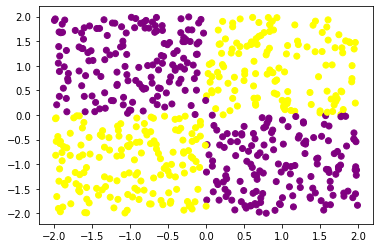

In [267]:
N = 600
np.random.seed(123)
data = np.random.uniform(-2,2,N*2).reshape(N,2)
color = []
for i in range(N):
    if data[i][0]*data[i][1]<0:
        color.append('purple')
    else:
        color.append('yellow')
plt.scatter(data[:,0],data[:,1],color = color)
plt.show()

4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [181]:
def grad_descent(x, y, W, V, b, c, iters, learning_rate):
    losses_curve = []
    params = np.array([W, V, b, c])
    for i in range(iters):
        W, V, b, c = params
        dLdW, dLdV, dLdb, dLdc, losses = grad_f(x, y, W, V, b, c)
        losses_curve.append(losses)
        grads = np.array([dLdW, dLdV, dLdb, dLdc])
        params = params - grads * learning_rate

    return losses_curve



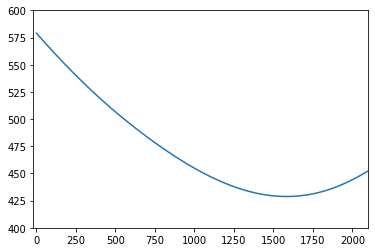

In [253]:
W = np.random.uniform(size=8).reshape(2,4)
V = np.random.uniform(size=4).reshape(4,1)
b = np.random.uniform(size=4).reshape(1,4)
c = np.random.uniform(size=1).reshape(1,1)
iters = 10000
learning_rate = 0.000001
X = data.reshape(600,2)
y = np.where(data[:, 0] * data[:, 1] >0 , 1, 0)
Y = np.where(y, 1, 0).reshape(600,1)
loss_gd = grad_descent(X, Y, W, V, b, c, iters, learning_rate)

plt.plot(loss_gd,'-')
plt.xlim(-20,2100)
plt.ylim(400,600)
plt.show()

5. Repeat the exercise above using Momentum. Comment on whether your
algorithm seems to converge more efficiently

In [218]:
def grad_descent_mm(x, y, W, V, b, c, iters, learning_rate,alpha):
    losses_curve = []
    params = np.array([W, V, b, c])
    paramms_mm = []
    paramms_mm.append(params)
    v = np.array([np.zeros(W.shape), np.zeros(V.shape), np.zeros(b.shape), np.zeros(c.shape)])
    for i in range(iters):
        W, V, b, c = params
        dLdW, dLdV, dLdb, dLdc, losses = grad_f(x, y, W, V, b, c)
        losses_curve.append(losses)
        grads = np.array([dLdW, dLdV, dLdb, dLdc])
        v = alpha*v+learning_rate*grads
        params = params - v
        paramms_mm.append(params)
    return losses_curve,paramms_mm

loss_mm,paramms_mm = grad_descent_mm(X, Y, W, V, b, c, iters, learning_rate,0.2)


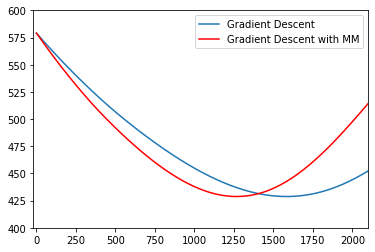

In [300]:
plt.plot(loss_gd,'-',label = 'Gradient Descent')
plt.plot(loss_mm,'-',color='red',label = 'Gradient Descent with MM')
plt.xlim(-20,2100)
plt.ylim(400,600)
plt.legend(loc = "upper right")
plt.show()

6. plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot

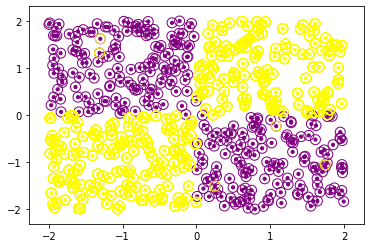

In [315]:
# find lowest loss 
# losses_curve.index(min(losses_curve))
w_l, v_l, b_l, c_l = paramms_mm[12]

yhat_l = ff_nn_ReLu(X, w_l, v_l, b_l, c_l)

yhat_c=['purple']*600
for i in range(0,600):
    if yhat_l[i]<0.55:
        yhat_c[i]= 'yellow'

plt.scatter(data[:,0],data[:,1],color = color,s=10)
plt.scatter(X[:,0],X[:,1] ,c='',marker = 'o',edgecolors = yhat_c, s=100)
plt.show()
